# Importing Libraries


In [31]:
import pandas as pd
import tqdm as tqdm

In [2]:
train_data=pd.read_csv(r'C:\Users\rctuh\Desktop\amazon_ml_challenge\dataset\train.csv')
test_data=pd.read_csv(r'C:\Users\rctuh\Desktop\amazon_ml_challenge\dataset\test.csv')
validation_data=pd.read_csv(r'C:\Users\rctuh\Desktop\amazon_ml_challenge\dataset\sample_submission.csv')

# Doing EDA on the Dataset 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print(train_data.head())
print("The Shape of the Training Data is : " ,train_data.shape)

   PRODUCT_ID                                              TITLE  \
0     1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1     2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   
2     2765088  PRIKNIK Horn Red Electric Air Horn Compressor ...   
3     1594019  ALISHAH Women's Cotton Ankle Length Leggings C...   
4      283658  The United Empire Loyalists: A Chronicle of th...   

                                       BULLET_POINTS  \
0  [LUXURIOUS & APPEALING: Beautiful custom-made ...   
1  [Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...   
2  [Loud Dual Tone Trumpet Horn, Compatible With ...   
3  [Made By 95%cotton and 5% Lycra which gives yo...   
4                                                NaN   

                                         DESCRIPTION  PRODUCT_TYPE_ID  \
0                                                NaN             1650   
1                                                NaN             2755   
2  Specifications: Color: Red, Mate

In [5]:
print(test_data.head())
print("The Shape of the Testing Data is : " ,test_data.shape)

   PRODUCT_ID                                              TITLE  \
0      604373  Manuel d'Héliogravure Et de Photogravure En Re...   
1     1729783  DCGARING Microfiber Throw Blanket Warm Fuzzy P...   
2     1871949  I-Match Auto Parts Front License Plate Bracket...   
3     1107571  PinMart Gold Plated Excellence in Service 1 Ye...   
4      624253  Visual Mathematics, Illustrated by the TI-92 a...   

                                       BULLET_POINTS  \
0                                                NaN   
1  [QUALITY GUARANTEED: Luxury cozy plush polyest...   
2  [Front License Plate Bracket Made Of Plastic,D...   
3  [Available as a single item or bulk packed. Se...   
4                                                NaN   

                                         DESCRIPTION  PRODUCT_TYPE_ID  
0                                                NaN             6142  
1  <b>DCGARING Throw Blanket</b><br><br> <b>Size ...             1622  
2  Replacement for The Following Vehic

### Just Exploring the Training Data

In [6]:
train_data.dtypes


PRODUCT_ID           int64
TITLE               object
BULLET_POINTS       object
DESCRIPTION         object
PRODUCT_TYPE_ID      int64
PRODUCT_LENGTH     float64
dtype: object

In [7]:
train_data.isnull().sum()

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [8]:
train_data.fillna("", inplace=True)


In [9]:
train_data.duplicated().sum()


0

In [10]:
train_data.isnull().sum()

PRODUCT_ID         0
TITLE              0
BULLET_POINTS      0
DESCRIPTION        0
PRODUCT_TYPE_ID    0
PRODUCT_LENGTH     0
dtype: int64

In [11]:
train_data.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,2.249698e+06,2.249698e+06,2.249698e+06
mean,1.499795e+06,4.000456e+03,4.071839e+03
std,8.661944e+05,3.966146e+03,1.351685e+06
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,7.494795e+05,2.300000e+02,5.118110e+02
50%,1.499558e+06,2.916000e+03,6.630000e+02
75%,2.250664e+06,6.403000e+03,1.062992e+03
max,2.999999e+06,1.342000e+04,1.885801e+09


In [39]:
sns.histplot(train_data['PRODUCT_LENGTH'])
plt.show()

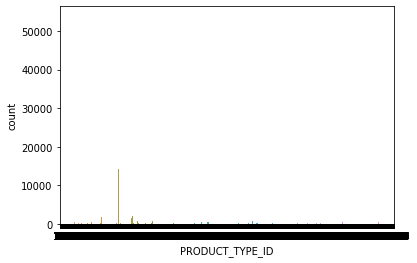

In [11]:
for col in ['PRODUCT_TYPE_ID']:
    sns.countplot(x=col, data=train_data)
    plt.show()

# Data Preprocessing

In [12]:
train_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,,,6112,598.424000


In [13]:
train_data.shape

(2249698, 6)

## Preprocessing the Product Desciption Column

In [42]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [43]:
def preprocess_text(text):
    # convert text to lowercase
    text = text.lower()
    
    # remove HTML tags
    text = re.sub('<.*?>', '', text)
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # tokenize the text
    tokens = word_tokenize(text)
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # join the tokens back into a string
    text = ' '.join(tokens)
    
    return text

In [44]:
from tqdm import tqdm

In [48]:
total_iterations = len(train_data['TITLE'])

for i, text in tqdm(enumerate(train_data['TITLE']), total=total_iterations):
    preprocessed_text = preprocess_text(text)
    train_data.at[i, 'TITLE'] = preprocessed_text


100%|██████████| 2249698/2249698 [13:07<00:00, 2854.99it/s]


In [49]:
train_data.to_csv('processed_traindata_title.csv', index=False)

In [50]:
train_data['TITLE'].head

<bound method NDFrame.head of 0          artzfolio tulip flower blackout curtain door w...
1          mark spencer girl pyjama set t862561cnavy mix910y
2          priknik horn red electric air horn compressor ...
3          alishah woman cotton ankle length legging comb...
4           united empire loyalist chronicle great migration
                                 ...                        
2249693    nike woman w ny df swsh hn kh bra cz7610010bla...
2249694    3pcs goose game cute cartoon enamel pin funny ...
2249695    kangroo sweep movement printed wooden wall clo...
2249696    electro voice ekxbrkt15 wall mount bracket ekx...
2249697    skyjacker c7360sp component box pnc7360pk 4 li...
Name: TITLE, Length: 2249698, dtype: object>

In [53]:
#pip install transformers

In [54]:
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


# Preprocess bullet_points column using BERT tokenizer
train_data['BULLET_POINTS'] = train_data['BULLET_POINTS'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))


c:\Users\rctuh\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


  Using cached transformers-4.28.1-py3-none-any.whl (7.0 MB)
     ---------------------------------------- 3.5/3.5 MB 6.7 MB/s eta 0:00:00
  Using cached huggingface_hub-0.13.4-py3-none-any.whl (200 kB)


Token indices sequence length is longer than the specified maximum sequence length for this model (741 > 512). Running this sequence through the model will result in indexing errors


In [55]:
train_data.to_csv('processed_train_bulletpoints_title.csv', index=False)

In [57]:
train_data['BULLET_POINTS']

0          [101, 1031, 20783, 1004, 16004, 1024, 3376, 76...
1          [101, 1031, 4302, 10693, 2002, 2094, 16279, 10...
2          [101, 1031, 5189, 7037, 4309, 9368, 7109, 1010...
3          [101, 1031, 2081, 2011, 5345, 1003, 6557, 1998...
4                                                 [101, 102]
                                 ...                        
2249693                 [101, 3430, 1024, 26572, 20367, 102]
2249694    [101, 1031, 100, 1031, 7780, 1033, 4427, 2011,...
2249695    [101, 1031, 13764, 2946, 1024, 2260, 5282, 199...
2249696                                           [101, 102]
2249697    [101, 1031, 6922, 3482, 2005, 1052, 2078, 1031...
Name: BULLET_POINTS, Length: 2249698, dtype: object

In [ ]:
#old code
##train_data['DESCRIPTION'] = train_data['DESCRIPTION'].apply(preprocess_text)

In [58]:
print(train_data['DESCRIPTION'].head())

0                                                     
1                                                     
2    Specifications: Color: Red, Material: Aluminiu...
3    AISHAH Women's Lycra Cotton Ankel Leggings. Br...
4                                                     
Name: DESCRIPTION, dtype: object


In [22]:
train_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
5,2152929,HINS Metal Bucket Shape Plant Pot for Indoor &...,"[Simple and elegant, great for displaying indo...",HINS Brings you the most Elegant Looking Pot w...,5725,950.000000
7,2026580,Delavala Self Adhesive Kitchen Backsplash Wall...,[HIGH QUALITY PVC MATERIAL: The kitchen alumin...,<p><strong>Aluminum Foil Stickers-good kitchen...,6030,984.251967
9,2998633,Hexwell Essential oil for Home Fragrance Oil A...,[100% Pure And Natural Essential Oil Or Fragra...,"Transform your home, workplace or hotel room i...",8201,393.700787


In [23]:
train_data.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH'],
      dtype='object')

In [59]:
# Preprocess bullet_points column using BERT tokenizer
train_data['DESCRIPTION'] = train_data['DESCRIPTION'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

In [60]:
# Preprocess bullet_points column using BERT tokenizer
train_data['TITLE'] = train_data['TITLE'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

In [62]:
train_data.head

<bound method NDFrame.head of          PRODUCT_ID                                              TITLE  \
0           1925202  [101, 2396, 2480, 14876, 12798, 10722, 15000, ...   
1           2673191  [101, 2928, 7084, 2611, 1052, 2100, 3900, 2863...   
2           2765088  [101, 26927, 2243, 8238, 7109, 2417, 3751, 225...   
3           1594019  [101, 4862, 25611, 2450, 6557, 10792, 3091, 41...   
4            283658    [101, 2142, 3400, 23414, 9519, 2307, 9230, 102]   
...             ...                                                ...   
2249693     2422167  [101, 18368, 2450, 1059, 6396, 1040, 2546, 254...   
2249694     2766635  [101, 1017, 15042, 2015, 13020, 2208, 10140, 9...   
2249695     1987786  [101, 16073, 3217, 2080, 11740, 2929, 6267, 47...   
2249696     1165754  [101, 16175, 2376, 23969, 2595, 19892, 25509, ...   
2249697     1072666  [101, 3712, 17364, 2121, 1039, 2581, 21619, 16...   

                                             BULLET_POINTS  \
0        [101, 1031

In [63]:
train_data.to_csv('processed_train_except_product_length.csv', index=False)

In [61]:
train_data.head

<bound method NDFrame.head of          PRODUCT_ID                                              TITLE  \
0           1925202  [101, 2396, 2480, 14876, 12798, 10722, 15000, ...   
1           2673191  [101, 2928, 7084, 2611, 1052, 2100, 3900, 2863...   
2           2765088  [101, 26927, 2243, 8238, 7109, 2417, 3751, 225...   
3           1594019  [101, 4862, 25611, 2450, 6557, 10792, 3091, 41...   
4            283658    [101, 2142, 3400, 23414, 9519, 2307, 9230, 102]   
...             ...                                                ...   
2249693     2422167  [101, 18368, 2450, 1059, 6396, 1040, 2546, 254...   
2249694     2766635  [101, 1017, 15042, 2015, 13020, 2208, 10140, 9...   
2249695     1987786  [101, 16073, 3217, 2080, 11740, 2929, 6267, 47...   
2249696     1165754  [101, 16175, 2376, 23969, 2595, 19892, 25509, ...   
2249697     1072666  [101, 3712, 17364, 2121, 1039, 2581, 21619, 16...   

                                             BULLET_POINTS  \
0        [101, 1031

# Renaming the Columns 
### Just a cosmetic change

In [24]:
#train_data = train_data.rename(columns={'PRODUCT_ID': 'product_id', 'TITLE': 'title', 'BULLET_POINTS': 'bullet_points', 'DESCRIPTION': 'description', 'PRODUCT_TYPE_ID': 'product_type_id', 'PRODUCT_LENGTH': 'product_length'})

In [25]:
#train_data.columns

Index(['product_id', 'title', 'bullet_points', 'description',
       'product_type_id', 'product_length'],
      dtype='object')

# Preprocessing the bullet points

In [27]:
#pip install autocorrect

In [28]:
#from nltk.stem import WordNetLemmatizer, SnowballStemmer
#from autocorrect import Speller

In [29]:
#import multiprocessing

In [30]:
# function to preprocess bullet points
''' def preprocess_bp(text):
    # convert text to lowercase
    text = text.lower()

    # remove HTML tags
    text = re.sub('<.*?>', '', text)

    # remove URLs and email addresses
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)

    # remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # tokenize the text
    tokens = word_tokenize(text)

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # spell correction
    spell = Speller(lang='en')
    tokens = [spell(word) for word in tokens]

    # stemming
    stemmer = SnowballStemmer('english')
    tokens = [stemmer.stem(word) for word in tokens]

    # join the tokens back into a string
    text = ' '.join(tokens)

    return text
 '''

In [32]:
''' # function to preprocess text data in chunks
def preprocess_data_in_chunks(data, chunk_size):
    # get number of available processors
    num_processors = multiprocessing.cpu_count()

    # create multiprocessing pool
    pool = multiprocessing.Pool(processes=num_processors)

    # get number of chunks
    num_chunks = int(len(data) / chunk_size) + 1

    # process data in chunks
    for i in tqdm(range(num_chunks)):
        start = i * chunk_size
        end = start + chunk_size
        chunk_data = data[start:end]
        preprocessed_data = pool.map(preprocess_bp, chunk_data)
        data[start:end] = preprocessed_data

    # close multiprocessing pool
    pool.close()

    return data
 '''

In [33]:
''' # preprocess bullet points in chunks
chunk_size = 5000
train_data['bullet_points'] = preprocess_data_in_chunks(list(train_data['bullet_points']), chunk_size)
 '''

  0%|          | 0/208 [00:00<?, ?it/s]

In [ ]:
''' train_data['bullet_points'].head() '''

2    [Loud Dual Tone Trumpet Horn, Compatible With ...
3    [Made By 95%cotton and 5% Lycra which gives yo...
5    [Simple and elegant, great for displaying indo...
7    [HIGH QUALITY PVC MATERIAL: The kitchen alumin...
9    [100% Pure And Natural Essential Oil Or Fragra...
Name: bullet_points, dtype: object

In [ ]:
#train_data.to_csv('processed_data.csv', index=False)

In [1]:
''' train_data.head() '''

NameError: name 'train_data' is not defined

In [ ]:
#pip install emoji

In [ ]:
#import emoji

In [ ]:
#from tqdm import tqdm

In [ ]:
''' def remove_emojis(text):
    cleaned_text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    cleaned_text = re.sub(r'#\w+', '', cleaned_text) # remove hashtags
    cleaned_text = re.sub(r'RT[\s]+', '', cleaned_text) # remove RT
    cleaned_text = re.sub(r'http\S+', '', cleaned_text) # remove URLs
    cleaned_text = re.sub(r'www\S+', '', cleaned_text) # remove the www
    cleaned_text = re.sub(r'twitter+', '', cleaned_text) # remove the twitter
    cleaned_text = re.sub(r'pic+', '', cleaned_text) # remove the pic
    cleaned_text = re.sub(r'com', '', cleaned_text) # remove the com
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    cleaned_text = emoji_pattern.sub(r'', text)
    return cleaned_text '''

In [ ]:
''' for text in tqdm(train_data['bullet_points']):
    processed_text = remove_emojis(text)
 '''

100%|██████████| 1038460/1038460 [00:20<00:00, 51896.05it/s]


In [ ]:
''' train_data.head() '''

,product_id,title,bullet_points,description,product_type_id,product_length
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...",specification color red material aluminium vol...,7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,aishah woman lycra cotton ankel legging brand ...,2996,787.401574
5,2152929,HINS Metal Bucket Shape Plant Pot for Indoor &...,"[Simple and elegant, great for displaying indo...",hin brings elegant looking pot stand durable l...,5725,950.000000
7,2026580,Delavala Self Adhesive Kitchen Backsplash Wall...,[HIGH QUALITY PVC MATERIAL: The kitchen alumin...,aluminum foil stickersgood kitchen helper mom ...,6030,984.251967
9,2998633,Hexwell Essential oil for Home Fragrance Oil A...,[100% Pure And Natural Essential Oil Or Fragra...,transform home workplace hotel room personal a...,8201,393.700787


In [ ]:
''' train_data.to_csv('processed_data_emoji.csv', index=False) '''

## Preprocessing the Test Data

In [65]:
test_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318


In [66]:
test_data.shape

(734736, 5)

In [67]:
test_data.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID'],
      dtype='object')

In [71]:
train_data['PRODUCT_ID'].head

<bound method NDFrame.head of 0          1925202
1          2673191
2          2765088
3          1594019
4           283658
            ...   
2249693    2422167
2249694    2766635
2249695    1987786
2249696    1165754
2249697    1072666
Name: PRODUCT_ID, Length: 2249698, dtype: int64>

In [73]:
test_data.PRODUCT_ID.head

<bound method NDFrame.head of 0          604373
1         1729783
2         1871949
3         1107571
4          624253
           ...   
734731     921419
734732    2456362
734733     841529
734734    1190194
734735    1040810
Name: PRODUCT_ID, Length: 734736, dtype: int64>

In [74]:
test_data.head

<bound method NDFrame.head of         PRODUCT_ID                                              TITLE  \
0           604373  Manuel d'Héliogravure Et de Photogravure En Re...   
1          1729783  DCGARING Microfiber Throw Blanket Warm Fuzzy P...   
2          1871949  I-Match Auto Parts Front License Plate Bracket...   
3          1107571  PinMart Gold Plated Excellence in Service 1 Ye...   
4           624253  Visual Mathematics, Illustrated by the TI-92 a...   
...            ...                                                ...   
734731      921419  Casual Canine Basic Hoodie for Dogs, 16" Mediu...   
734732     2456362  Dive Log Book: Scuba Diving Logbook for Beginn...   
734733      841529  Axor 39135001 Citterio Widespread Faucet with ...   
734734     1190194  Caroline's Treasures BB1801DS812 Halloween Bas...   
734735     1040810  Amsahr 18C1623 Lexmark X3530 Remanufactured Re...   

                                            BULLET_POINTS  \
0                               

In [75]:
# Preprocess TEST DATA  columns using BERT tokenizer
#test_data['PRODUCT_ID'] = test_data['PRODUCT_ID'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

In [79]:
test_data.fillna("", inplace=True)


In [80]:
test_data['TITLE'] = test_data['TITLE'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))


In [81]:
test_data['BULLET_POINTS'] = test_data['BULLET_POINTS'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))


In [82]:
test_data['DESCRIPTION'] = test_data['DESCRIPTION'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))


In [89]:
train_data.to_csv('processed_test_data_all_columns.csv', index=False)

In [90]:
train_data.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH'],
      dtype='object')

In [91]:
train_data.head

<bound method NDFrame.head of          PRODUCT_ID                                              TITLE  \
0           1925202  [101, 2396, 2480, 14876, 12798, 10722, 15000, ...   
1           2673191  [101, 2928, 7084, 2611, 1052, 2100, 3900, 2863...   
2           2765088  [101, 26927, 2243, 8238, 7109, 2417, 3751, 225...   
3           1594019  [101, 4862, 25611, 2450, 6557, 10792, 3091, 41...   
4            283658    [101, 2142, 3400, 23414, 9519, 2307, 9230, 102]   
...             ...                                                ...   
2249693     2422167  [101, 18368, 2450, 1059, 6396, 1040, 2546, 254...   
2249694     2766635  [101, 1017, 15042, 2015, 13020, 2208, 10140, 9...   
2249695     1987786  [101, 16073, 3217, 2080, 11740, 2929, 6267, 47...   
2249696     1165754  [101, 16175, 2376, 23969, 2595, 19892, 25509, ...   
2249697     1072666  [101, 3712, 17364, 2121, 1039, 2581, 21619, 16...   

                                             BULLET_POINTS  \
0        [101, 1031

In [92]:
test_data.head

<bound method NDFrame.head of         PRODUCT_ID                                              TITLE  \
0           604373  [101, 7762, 1040, 1005, 2002, 12798, 17643, 19...   
1          1729783  [101, 5887, 6843, 2075, 12702, 8873, 5677, 546...   
2          1871949  [101, 1045, 1011, 2674, 8285, 3033, 2392, 6105...   
3          1107571  [101, 9231, 22345, 2751, 5127, 2094, 8012, 199...   
4           624253  [101, 5107, 5597, 1010, 7203, 2011, 1996, 1484...   
...            ...                                                ...   
734731      921419  [101, 10017, 28735, 3937, 7415, 2666, 2005, 60...   
734732     2456362  [101, 11529, 8833, 2338, 1024, 28651, 9404, 88...   
734733      841529  [101, 22260, 2953, 4464, 17134, 29345, 2487, 2...   
734734     1190194  [101, 7981, 1005, 1055, 17605, 22861, 15136, 2...   
734735     1040810  [101, 2572, 3736, 8093, 2324, 2278, 16048, 219...   

                                            BULLET_POINTS  \
0                               

# Building a model and training it 

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [236]:
# Load the training and testing data
train_data = pd.read_csv(r'C:\Users\rctuh\Desktop\amazon_ml_challenge\dataset\train.csv')

In [258]:
#pip install gensim
import gensim

# Load the GloVe embeddings
glove_file = 'glove.6B.100d.w2vformat.txt'
model = gensim.models.KeyedVectors.load_word2vec_format(glove_file, binary=False)


In [237]:
# Load the GloVe embeddings
embeddings_dict = {}
with open("glove.6B.100d.txt", 'r', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [259]:
train_data.shape

(2249698, 5)

In [239]:
#train_data.drop('PRODUCT_ID',axis=1,inplace=True)
#train_data.columns
train_data.shape
train_data.fillna("", inplace=True)


In [240]:
# Define the features and target variable
train_features = []
for index, row in train_data.iterrows():
    title = str(row['TITLE'])
    bullet_points = str(row['BULLET_POINTS'])
    description = str(row['DESCRIPTION'])
# Convert text to GloVe embeddings
title_embedding = np.mean([embeddings_dict.get(word, np.zeros((100,))) for word in title.split()], axis=0)
bullet_points_embedding = np.mean([embeddings_dict.get(word, np.zeros((100,))) for word in bullet_points.split()], axis=0)
description_embedding = np.mean([embeddings_dict.get(word, np.zeros((100,))) for word in description.split()], axis=0)
    
features = np.concatenate((np.array([row['PRODUCT_TYPE_ID']]), title_embedding, bullet_points_embedding, description_embedding))
train_features.append(features)


In [244]:
train_target = train_data['PRODUCT_LENGTH']

In [246]:
train_target.shape

(2249698,)

In [247]:
train_features = np.array(train_features)

In [248]:
train_features.shape

(1, 301)

In [249]:
train_target = np.array(train_target).reshape(-1, 1)


In [145]:
#train_target

In [250]:
train_features

array([[ 7.36700000e+03, -1.65538238e-02,  2.87505888e-02,
        -2.20938822e-02,  3.64435298e-02, -1.28356430e-02,
        -1.07605887e-02,  8.08147052e-02,  2.91297642e-02,
        -8.55529308e-03, -3.52717647e-02,  1.05778820e-01,
        -2.39888237e-02, -5.61058802e-02,  2.02705930e-03,
         6.08705891e-02,  1.41552923e-03, -1.45335294e-02,
         7.04882338e-02, -6.64747059e-02,  5.66958811e-02,
         1.19552928e-02,  9.37470618e-03,  1.27582357e-02,
         8.76294094e-02,  4.95723517e-02,  5.23776465e-02,
         6.03517645e-02,  2.93223525e-02, -3.28764670e-03,
         2.95411769e-02,  1.42888234e-02,  2.78935275e-02,
         2.13352352e-02, -3.81399998e-02, -5.73164680e-02,
         2.26535297e-02,  3.80452955e-02, -1.14629426e-02,
         2.79361174e-02,  1.85329406e-02,  9.42299997e-02,
        -8.68611778e-02,  2.79579406e-02, -5.24564701e-02,
         3.56529390e-03, -5.56520941e-02, -2.56717626e-02,
        -6.58352761e-03,  9.75005898e-03,  5.15594114e-0

In [252]:
train_target.shape

(2249698, 1)

In [255]:
train_features = np.array(train_features)
train_features.shape

(1, 301)

In [256]:
train_features_reshaped = train_features.reshape(-1,1)
train_features_reshaped.shape

(301, 1)

In [228]:
train_target = np.array(train_target)

In [229]:
target_mean = np.mean(train_target)

In [230]:
train_target_binary = np.where(train_target > target_mean, 1, 0)

In [231]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [143]:
#train_target_binary

In [232]:
model.fit(train_features_reshaped, train_target_binary)

ValueError: Found input variables with inconsistent numbers of samples: [301, 2249698]

In [148]:
test_data.shape

(2249698, 6)

In [168]:
df2=pd.read_csv(r'C:\Users\rctuh\Desktop\amazon_ml_challenge\dataset\test.csv')

In [175]:
df2.drop('PRODUCT_ID',axis=1,inplace=True)

In [176]:
df2.columns

Index(['TITLE', 'BULLET_POINTS', 'DESCRIPTION', 'PRODUCT_TYPE_ID'], dtype='object')

In [177]:
df2.dtypes

TITLE              object
BULLET_POINTS      object
DESCRIPTION        object
PRODUCT_TYPE_ID     int64
dtype: object

In [180]:
# Make predictions on the test data
test_features = []
for index, row in df2.iterrows():
    title = str(row['TITLE'])
    bullet_points = str(row['BULLET_POINTS'])
    description = str(row['DESCRIPTION'])

    
    # Convert text to GloVe embeddings
    title_embedding = np.mean([embeddings_dict.get(word, np.zeros((100,))) for word in title.split()], axis=0)
    bullet_points_embedding = np.mean([embeddings_dict.get(word, np.zeros((100,))) for word in bullet_points.split()], axis=0)
    description_embedding = np.mean([embeddings_dict.get(word, np.zeros((100,))) for word in description.split()], axis=0)
    
    features = np.concatenate((np.array([row['PRODUCT_TYPE_ID']]), title_embedding, bullet_points_embedding, description_embedding))
    test_features.append(features)

In [181]:
test_features = np.array(test_features)


In [182]:
test_features.reshape(-1,1)

array([[ 6.14200000e+03],
       [ 4.62218198e-02],
       [-1.48436362e-01],
       ...,
       [-2.30554561e-01],
       [ 3.68742842e-01],
       [ 4.07697734e-02]])

In [185]:
test_features.shape

(734736, 301)

In [162]:
y.pred=model.predict(test_features)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.